In [1]:
import epipack
import matplotlib.pyplot as plt
import numpy as np
from epipack import StochasticEpiModel
import networkx as nx
plt.rcParams['font.size'] = 22
import time

/Users/katharinaledebur/opt/anaconda3/lib/python3.9/site-packages/epipack/stochastic_epi_models.py:18: UserWarning: Couldn't find the efficient implementation of `SamplableSet` (see github.com/gstonge/SamplableSet). Proceeding with less efficient implementation.
  warnings.warn("Couldn't find the efficient implementation of `SamplableSet` (see github.com/gstonge/SamplableSet). Proceeding with less efficient implementation.")


In [2]:
# create a Erdoes Renyi graph with 100 nodes
# SEIR model on graph
# always use the same graph 
# transmission rate is 0.1, 1 day exposed, 5 days infectious 
# heterogeneity function: ratio of scared people (50 percent), reduction of transmission scared, reduction of transmission reckless

In [60]:
p = 0.0097
N = 1000

In [153]:
len(G.edges)

4846

In [61]:
G = nx.erdos_renyi_graph(N, p, seed=2, directed=False)

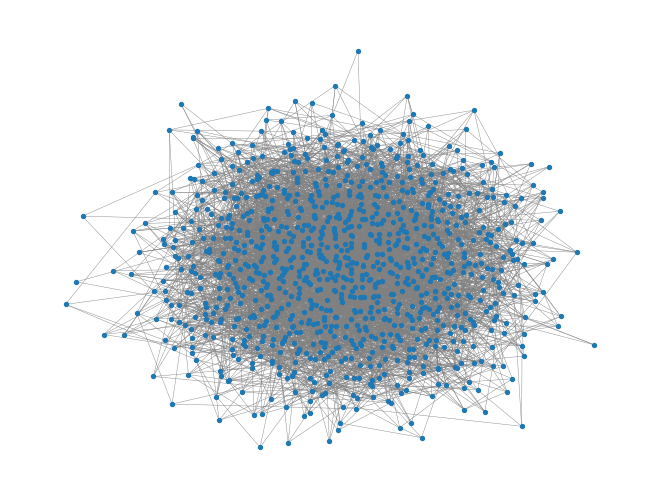

In [62]:
nx.draw(G, node_size = 8, width = 0.3, edge_color = 'grey')

In [63]:
sum([G.degree()[i] for i in range(len(G.degree()))])/len(G.degree())

9.692

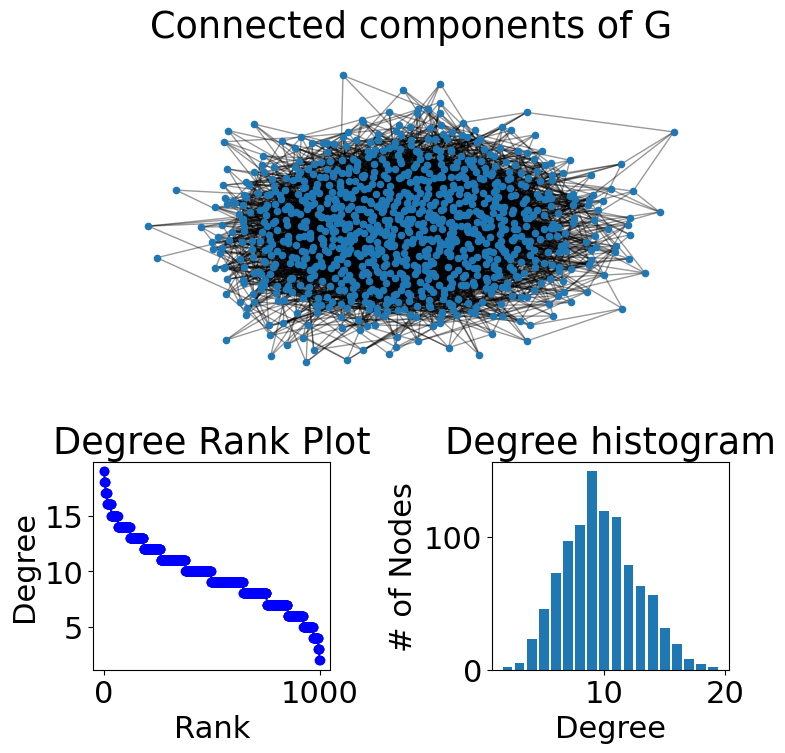

In [64]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [ ]:
#stylized_network, config = nw.visualize(G)

In [74]:
# rates
beta = recovery_rate = 1/5
alpha = infection_rate = 0.1
gamma = exposed_rate = 1/3
red = 1

# compartments/ state of nodes
compartments = list("SEIR")

# processes
node_transition = [
     
    ('E', gamma, 'I'),
    ('I', beta, 'R'),
]

link_transmission = [
    ('I', 'S',alpha * red, 'I', 'E')]

# model setup

edges = [ (e[0], e[1], 1) for e in \
          nx.erdos_renyi_graph(N, p, seed=2, directed=False).edges() ]


In [93]:
%%time
I_init = int(0.001 * N)
model = StochasticEpiModel(
           compartments=compartments,
           N=N,
           edge_weight_tuples=edges
           )\
       .set_link_transmission_processes(link_transmission)\
       .set_node_transition_processes(node_transition)\
       .set_random_initial_conditions({
                                       'S': N-I_init,
                                       'E': 0,
                                       'I': I_init,
                                       'R': 0
    
                                      })
t, result = model.simulate(100)

CPU times: user 325 ms, sys: 6.71 ms, total: 332 ms
Wall time: 328 ms


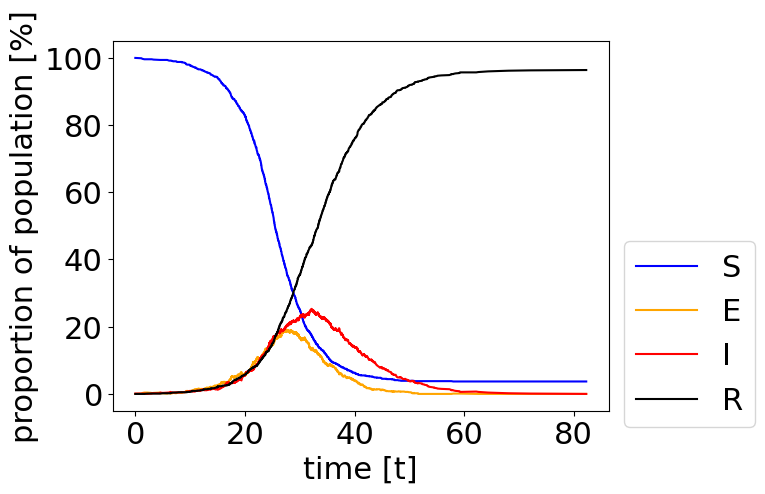

In [94]:
plt.plot(t,100*(result['S']/N), c = 'b')
plt.plot(t,100*(result['E']/N), c = 'orange')
plt.plot(t,100*(result['I']/N), c = 'r')
plt.plot(t,100*(result['R']/N), c = 'k')
plt.legend(['S','E','I', 'R'], bbox_to_anchor = [1,.5])
#plt.xlim(0,30)
plt.xlabel('time [t]')
plt.ylabel('proportion of population [%]');

In [ ]:
#import netwulf as nw

In [ ]:
#stylized_network, config = nw.visualize(G)

In [ ]:
#from epipack.vis import visualize

In [ ]:
#config = {
#            'plot_sampled_curve': True,
#            'draw_links':True,
#            'draw_nodes':True,
#            'n_circle_segments':16,
#            'plot_height':120,
#            'bgcolor':'#253237',
#            'curve_stroke_width':4.0,
#            'node_stroke_width':1.0,
#            'link_color': '#4b5a62',
#            'node_stroke_color':'#000000',
#            'node_color':'#264653',
#            'bound_increase_factor':1.0,
#            'update_dt':0.04,
#            'show_curves':True,
#            'draw_nodes_as_rectangles':False,
#            'show_legend': True,
#            'legend_font_color':None,
#            'legend_font_size':10,
#            'padding':10,
#            'compartment_colors':['green', 'turquoise', 'red', 'white'],
#            'palette': "dark",
#        }

In [ ]:
#epipack.vis.visualize(model, stylized_network, .1, config)

In [111]:
# rates
#beta = recovery_rate = 1/5
#alpha = infection_rate = 0.4
red_reckless = 1.5
red_scared = 0.5
#gamma = exposed_rate = 1/3


# compartments/ state of nodes
compartments = list("FCEIR")

# processes
node_transition = [
     
    ('E', gamma, 'I'),
    ('I', beta, 'R'),
]

link_transmission = [
    ('I', 'F',alpha*red_scared, 'I', 'E'),
    ('I', 'C',alpha*red_reckless, 'I', 'E')
]

# model setup

 

edges = [ (e[0], e[1], 1) for e in \
          nx.erdos_renyi_graph(N, p, seed=2, directed=False).edges() ]





In [148]:
%%time
I_init = int(0.001 * N)
chosen_inf_ag = np.random.choice(['F','C'],1)[0]
if chosen_inf_ag == 'F':
    F_init = ((N-I_init)-1)/2
    C_init = ((N-I_init)+1)/2
else:
    C_init = ((N-I_init)-1)/2
    F_init = ((N-I_init)+1)/2
model = StochasticEpiModel(
           compartments=compartments,
           N=N,
           edge_weight_tuples=edges
           )\
       .set_link_transmission_processes(link_transmission)\
       .set_node_transition_processes(node_transition)\
       .set_random_initial_conditions({
                                       'F': int(F_init),
                                       'C': int(C_init),
                                       'E': 0,
                                       'I': I_init,
                                       'R': 0
    
                                      })

t, result = model.simulate(100)


CPU times: user 434 ms, sys: 8.52 ms, total: 442 ms
Wall time: 437 ms


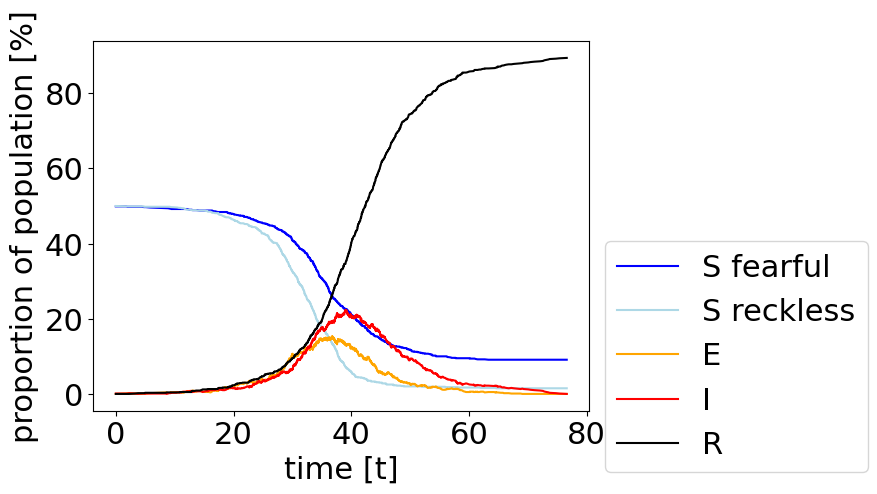

In [149]:
plt.plot(t,100*(result['F']/N), c = 'b')
plt.plot(t,100*(result['C']/N), c = 'lightblue')
plt.plot(t,100*(result['E']/N), c = 'orange')
plt.plot(t,100*(result['I']/N), c = 'r')
plt.plot(t,100*(result['R']/N), c = 'k')
plt.legend(['S fearful','S reckless','E','I', 'R'], bbox_to_anchor = [1,.5])
#plt.xlim(0,30)
plt.xlabel('time [t]')
plt.ylabel('proportion of population [%]');

## vis

In [ ]:
#config = {
#            'plot_sampled_curve': True,
#            'draw_links':True,
#            'draw_nodes':True,
#            'n_circle_segments':16,
#            'plot_height':120,
#            'bgcolor':'#253237',
#           'curve_stroke_width':4.0,
#            'node_stroke_width':1.0,
#            'link_color': '#4b5a62',
#            'node_stroke_color':'#000000',
#            'node_color':'#264653',
#            'bound_increase_factor':1.0,
#            'update_dt':0.04,
#            'show_curves':True,
#            'draw_nodes_as_rectangles':False,
#            'show_legend': True,
#            'legend_font_color':None,
#            'legend_font_size':10,
#            'padding':10,
#            'compartment_colors':['green', 'blue', 'orange', 'red', 'grey'],
#           'palette': "dark",
#        }

In [ ]:
#stylized_network, config = nw.visualize(G)

In [ ]:
#epipack.vis.visualize(model, stylized_network, .12, config)

In [ ]:
G = nx.barabasi_albert_graph(100,2,seed=2)
pos = nx.spring_layout(G,seed=2)

color_map = []
for i in range(len(pos)):
    if pos[i][0] < 0:
        color_map.append('r')
    else: 
        color_map.append('b')  

nx.draw(G,pos, node_size = 30, node_color=color_map)

In [ ]:
import random

In [ ]:
G = nx.watts_strogatz_graph(100, 2, 0.1,seed=2)
pos = nx.circular_layout(G)
color_map = []
for node in G:
    if node < 50:
        color_map.append('r')
    else: 
        color_map.append('b') 
        

random.shuffle(color_map)
nx.draw(G,pos, node_size = 30, node_color=color_map)

In [ ]:
G = nx.erdos_renyi_graph(100, 0.02,seed=2)
pos = nx.spring_layout(G,seed=2)
color_map = []
for node in G:
    if node < 50:
        color_map.append('r')
    else: 
        color_map.append('b')
color_map = []
for i in range(len(pos)):
    if pos[i][0] < 0:
        color_map.append('g')
    else: 
        color_map.append('k')  
nx.draw(G, pos,node_size = 30, node_color=color_map)